In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
holidays = pd.read_csv(r"..\Data\01_raw\holidays_events.csv")
train = pd.read_csv(r"..\Data\01_raw\train.csv")

In [31]:
train_holidays_df = pd.merge(train, holidays, on='date', how='outer')

In [38]:
output = []

for column in train_holidays_df.columns:

    null_values  = np.sum(pd.isna(train_holidays_df[column]))
    unique = train_holidays_df[column].nunique()
    column_data_type = train_holidays_df[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = train_holidays_df.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,min,25%,50%,75%,max,std
id,68,3000888,float64,3054348.0,1504276.775379,0.0,754676.75,1507571.5,2255120.25,3000887.0,866261.012008
date,0,1744,datetime64[ns],3054416,2015-04-26 12:03:38.346682880,2012-03-02 00:00:00,2014-03-01 00:00:00,2015-04-28 00:00:00,2016-06-22 00:00:00,2017-12-26 00:00:00,NaN
store_nbr,68,54,float64,3054348.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
family,68,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,68,379610,float64,3054348.0,359.020892,0.0,0.0,11.0,196.011,124717.0,1107.285897
onpromotion,68,362,float64,3054348.0,2.61748,0.0,0.0,0.0,0.0,741.0,12.254939
type,0,7,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locale,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locale_name,0,25,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,0,104,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
train_holidays_df['type'] = train_holidays_df['type'].fillna('No Holiday')
train_holidays_df['description'] = train_holidays_df['description'].fillna('Not a Holiday')
train_holidays_df['locale'] = train_holidays_df['locale'].fillna('Unknown')
train_holidays_df['locale_name'] = train_holidays_df['locale_name'].fillna('Unknown')
train_holidays_df['transferred'] = train_holidays_df['transferred'].fillna('Not Applicable')


In [41]:
train_holidays_df['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'No Holiday',
       'Work Day', 'Event'], dtype=object)

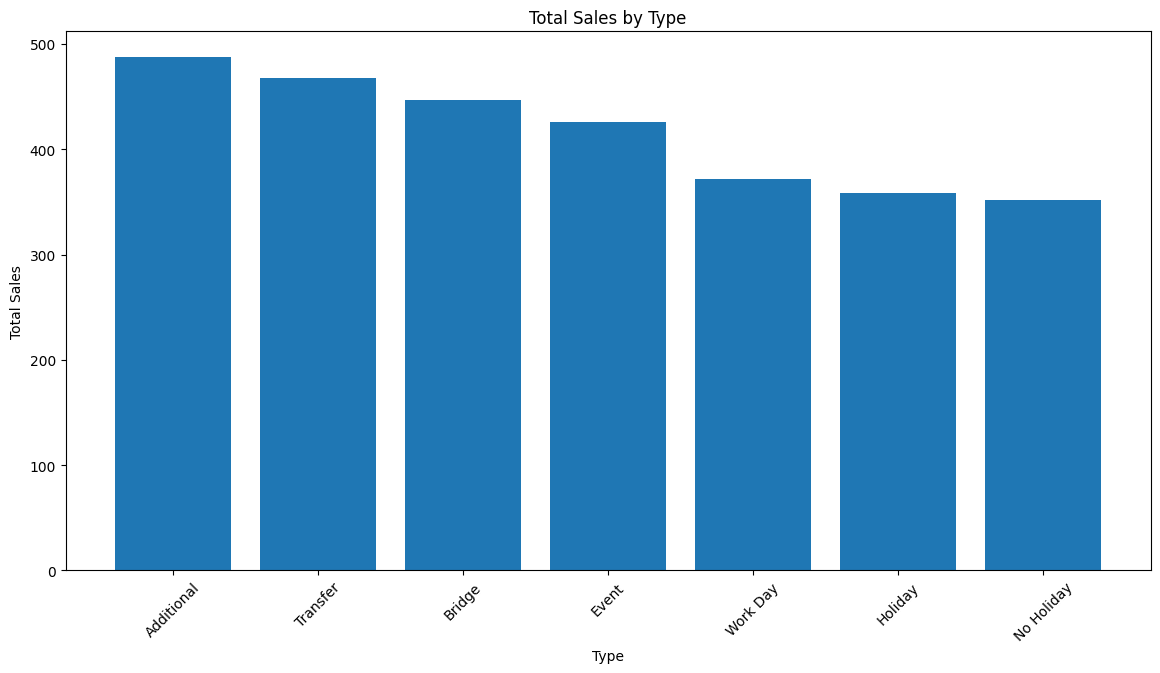

In [45]:
train_holidays_df['date'] = pd.to_datetime(train_holidays_df['date'])

sales_by_holiday = train_holidays_df.groupby('type')['sales'].mean().reset_index()

sales_by_holiday = sales_by_holiday.sort_values(by='sales', ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(sales_by_holiday['type'], sales_by_holiday['sales'])
plt.xlabel('Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Type')
plt.xticks(rotation=45)
plt.show()


Average sales are highest for type additinal And minimum during for type No Holiday.